# Polynomial Time



## Introduction to Time Complexity
Before tackling what exactly the complexity class P is, we must first establish what time complexity is. Time complexity is a measure of the amount of time it takes to solve a problem as a function of the input size, often expressed in "Big O Notation". "Big O Notation" denotes complexity by having "O" followed by a value in brackets. For example, the "constant" complexity class is "O(1)", as the complexity is the same regardless of the input. Put simply, time complexity is generally a measure of how efficient an algorithm is, and how well it handles larger input sizes.
### Examples of Complexity Classes
Below are some examples of the different complexity classes, and how their complexity changes with the amount of inputs.

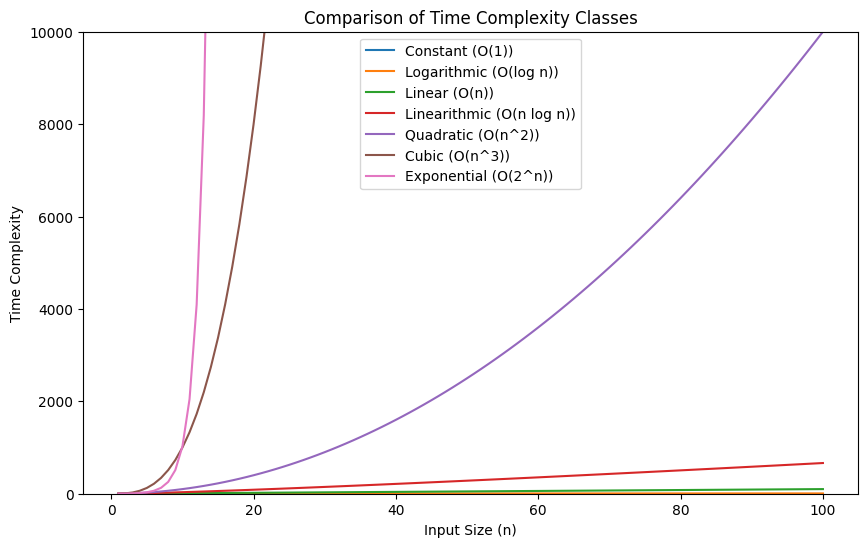

In [32]:
import matplotlib.pyplot as plt
import numpy as np


n_values = np.linspace(1, 100, 100)


complexity_classes = {
    "Constant": (np.ones(len(n_values)), "O(1)"),
    "Logarithmic": (np.log2(n_values), "O(log n)"),
    "Linear": (n_values, "O(n)"),
    "Linearithmic": (n_values * np.log2(n_values), "O(n log n)"),
    "Quadratic": (n_values**2, "O(n^2)"),
    "Cubic": (n_values**3, "O(n^3)"),
    "Exponential": (2**n_values, "O(2^n)")
}


plt.figure(figsize=(10,6))
for complexity_class in complexity_classes:
    label = f"{complexity_class} ({complexity_classes[complexity_class][1]})"
    plt.plot(n_values, complexity_classes[complexity_class][0], label=label)
plt.title("Comparison of Time Complexity Classes")
plt.xlabel("Input Size (n)")
plt.ylabel("Time Complexity")
plt.ylim(0, 10000)
plt.legend()
plt.show()




## Deterministic Turing Machines
As part of class "P" is defined by how it can be solved by a deterministic turing machine, it is important to understand what they are before discussing polynomial time complexity.
A deterministic turing machine is a theoretical model of computing that is defined as "A machine with an infinite tape divided into cells, the ability to read and write from, and onto said cells, and operates by "states" that determine how the machine moves between cells, what gets written onto them, when the program ends, etc. Every problem that is computable is said to be possible on this theoretical machine. The purpose of the turing machine is to strip the process of computing down to its barest essentials. Below is a python example of a turing machine that checks if the input contains a zero, and returns false if that is the case. While emulating its functionality through Python makes it look very complex, the actual mechanisms are very simple.

In [33]:

def transition(state, symbol):
    if state == 'start' and symbol == '1':
        return ('start', '1', 'R')
    elif state == 'start' and symbol == '0':
        return ('reject', '0', 'N')
    elif state == 'start' and symbol == '_':
        return ('accept', '_', 'N')
    elif state == 'reject' or state == 'accept':
        return (state, symbol, 'N')
    elif state == 'start' and symbol != '1':
        return ('reject', symbol, 'N')
    else:
        return ('reject', symbol, 'N')

def run_tm(input_string):
    tape = list(input_string) + ['_'] 
    head_pos = 0
    state = 'start'

    
    while state != 'accept' and state != 'reject':
        symbol = tape[head_pos]
        new_state, new_symbol, move = transition(state, symbol)
        tape[head_pos] = new_symbol
        if move == 'R':
            head_pos += 1
            if head_pos == len(tape):
                tape.append('_')
        elif move == 'L':
            head_pos -= 1
            if head_pos == -1:
                tape = ['_'] + tape
                head_pos = 0
        state = new_state

    
    if state == 'accept':
        return True
    else:
        return False


input_string = '111111111'
result = run_tm(input_string)
print(result)



True


## Polynomial Time Complexity
The polynomial time complexity class "P" is the entire set of decision problems that can be solved by a deterministic turing machine in polynomial time, which is to say that they can be solved "in a reasonable amount of time". Therefore, any problem in P <em>should</em> have an algorithm that is reasonably efficient.

There is also the complexity class "NP", which stands for "nondeterministic polynomial time", where the correctness of a solution can be verified in polynomial time. While all of class "P" is in "NP", it is yet to be proven if all of "NP" is in "P". One famous example of an "NP-complete" problem is the "Travelling Salesman Problem", which asks "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the starting city?" There currently is no known complexity class P algorithm for resolving it.
The debate of whether P == NP is an extremely important one, as P being equal to NP would confirm many different long-unresolved problems (such as the aforementioned Travelling Salesman Problem) as solvable in polynomial time.

On the other hand, if P != NP, then it confirms that not all problems can be solved in a reasonable amount of time with the correct algorithm.